#### Data from the City of Seattle! Thanks!

https://data.seattle.gov/Transportation/Paid-Parking-Transaction-Data/gg89-k5p6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio

data_frame = pd.read_csv('C:/Users/aaron/Code/Data/Paid_Parking_Transaction_Data.csv', parse_dates=[2])

data_frame

,Transaction ID,Meter Code,Transaction DateTime,Payment Mean,Amount Paid,Duration In Minutes,Blockface Name,Side Of Street,Element key,Parking Space Number,Latitude,Longitude
0,1292603648,19126010,2023-11-08 07:55:00,PHONE,1.09,131,EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST,W,10165,NaN,47.627340,-122.329366
1,1292568418,21144004,2023-11-08 03:58:00,CREDIT CARD,9.50,240,LENORA ST BETWEEN 9TH AVE AND TERRY AVE,NW,79365,NaN,47.617551,-122.336685
2,1292572035,17123004,2023-11-08 04:37:00,CREDIT CARD,6.00,240,REPUBLICAN ST BETWEEN 1ST AVE N AND WARREN AVE N,N,80537,NaN,47.623338,-122.354753
3,1292572577,19126010,2023-11-08 04:45:00,CREDIT CARD,5.25,330,EASTLAKE AVE E BETWEEN ALOHA ST AND WARD ST,W,10165,NaN,47.627340,-122.329366
4,1292575353,19127010,2023-11-08 05:09:00,PHONE,1.73,189,EASTLAKE AVE E BETWEEN WARD ST AND PROSPECT ST,W,120102,NaN,47.628236,-122.329386
...,...,...,...,...,...,...,...,...,...,...,...,...
136845,1294250492,8522002,2023-11-14 08:29:00,PHONE,2.50,60,MARION ST BETWEEN 7TH AVE AND 8TH AVE,SE,79658,NaN,47.606961,-122.328280
136846,1294250493,17046004,2023-11-14 08:28:00,PHONE,0.50,60,ROY ST BETWEEN NOB HILL AVE N AND 4TH AVE N,N,80645,NaN,47.625491,-122.349552
136847,1294250498,17017002,2023-11-14 08:30:00,CREDIT CARD,1.00,120,QUEEN ANNE AVE N BETWEEN MERCER ST AND ROY ST,E,12290,NaN,47.625011,-122.356601
136848,1294250514,16103004,2023-11-14 08:39:00,PHONE,0.25,30,ROOSEVELT WAY NE BETWEEN NE 63RD ST AND NE 64T...,E,80594,NaN,47.674556,-122.317282


In [2]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136850 entries, 0 to 136849
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Transaction ID        136850 non-null  int64         
 1   Meter Code            136850 non-null  int64         
 2   Transaction DateTime  136850 non-null  datetime64[ns]
 3   Payment Mean          136850 non-null  object        
 4   Amount Paid           136850 non-null  float64       
 5   Duration In Minutes   136850 non-null  int64         
 6   Blockface Name        136850 non-null  object        
 7   Side Of Street        136850 non-null  object        
 8   Element key           136850 non-null  int64         
 9   Parking Space Number  3010 non-null    float64       
 10  Latitude              136850 non-null  float64       
 11  Longitude             136850 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memo

In [3]:
data_frame.sort_values('Transaction DateTime', ascending=True, inplace=True)

data_frame.head()

,Transaction ID,Meter Code,Transaction DateTime,Payment Mean,Amount Paid,Duration In Minutes,Blockface Name,Side Of Street,Element key,Parking Space Number,Latitude,Longitude
1,1292568418,21144004,2023-11-08 03:58:00,CREDIT CARD,9.50,240,LENORA ST BETWEEN 9TH AVE AND TERRY AVE,NW,79365,NaN,47.617551,-122.336685
4567,1292568452,21107004,2023-11-08 03:59:00,CREDIT CARD,9.50,240,9TH AVE BETWEEN STEWART ST AND VIRGINIA ST,SW,8617,NaN,47.615961,-122.335148
5581,1292568741,10170002,2023-11-08 04:01:00,PHONE,0.97,116,VIRGINIA ST BETWEEN 7TH AVE AND 8TH AVE,NW,13313,NaN,47.615443,-122.337085
5647,1292568951,12022002,2023-11-08 04:03:00,PHONE,0.98,118,BROOKLYN AVE NE BETWEEN NE 45TH ST AND NE 47TH ST,W,9509,NaN,47.662174,-122.314329
5648,1292569243,19127010,2023-11-08 04:06:00,PHONE,4.65,306,EASTLAKE AVE E BETWEEN WARD ST AND PROSPECT ST,W,120102,NaN,47.628236,-122.329386


In [4]:
print ('$$$ paid = ', data_frame['Amount Paid'].sum())
print ('Total minutes parked = ', data_frame['Duration In Minutes'].sum())

$$$ paid =  571831.25
Total minutes parked =  11589961


In [5]:
print (data_frame['Latitude'].nunique())
print (data_frame['Longitude'].nunique())
print (data_frame['Blockface Name'].nunique())

1511
1510
973


In [6]:
### add hour column for dataframe creation
data_frame['Hour'] = data_frame['Transaction DateTime'].dt.hour

In [8]:

#### awesome line of code making 24 different masks
dfDict = { i: data_frame[data_frame['Hour'] == i] for i in range(24) }
dfDict[7]



# print (dict[4])

,Transaction ID,Meter Code,Transaction DateTime,Payment Mean,Amount Paid,Duration In Minutes,Blockface Name,Side Of Street,Element key,Parking Space Number,Latitude,Longitude,Hour
4587,1292590025,11070004,2023-11-08 07:00:00,PHONE,0.50,60,TALLMAN AVE NW BETWEEN NW CENTRAL PL AND NW MA...,SW,35681,NaN,47.667907,-122.380924,7
4257,1292590026,19150010,2023-11-08 07:00:00,PHONE,12.00,600,ROY ST BETWEEN FAIRVIEW AVE N AND MINOR AVE N,S,12682,NaN,47.625072,-122.333446,7
31,1292589975,7078002,2023-11-08 07:00:00,PHONE,0.50,60,12TH AVE BETWEEN E MADISON ST AND E PIKE ST,W,69445,NaN,47.613515,-122.316989,7
5731,1292589993,10080002,2023-11-08 07:00:00,CREDIT CARD,1.00,120,LENORA ST BETWEEN 1ST AVE AND 2ND AVE,SE,11398,NaN,47.612131,-122.343420,7
83,1292590100,17075004,2023-11-08 07:00:00,PHONE,0.51,61,1ST AVE N BETWEEN THOMAS ST AND HARRISON ST,W,1037,NaN,47.621520,-122.355514,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111497,1294240180,15106002,2023-11-14 07:59:00,CASH,0.50,12,WOODLAWN AVE NE BETWEEN NE 72ND ST AND NE 73RD ST,SW,59013,NaN,47.680822,-122.324986,7
111585,1294240427,17060004,2023-11-14 07:59:00,PHONE,6.00,240,1ST AVE W BETWEEN W HARRISON ST AND W REPUBLIC...,E,46458,NaN,47.622694,-122.357954,7
110914,1294240288,21080004,2023-11-14 07:59:00,PHONE,1.75,70,YALE AVE BETWEEN HOWELL ST AND STEWART ST,SW,81685,NaN,47.617841,-122.330403,7
111493,1294240121,7059002,2023-11-14 07:59:00,PHONE,0.12,14,E PIKE ST BETWEEN 11TH AVE AND 12TH AVE,N,14677,NaN,47.614170,-122.317487,7


In [13]:
data_frame['Payment Mean'].value_counts()

PHONE          105692
CREDIT CARD     28782
CASH             2311
MIXED              65
Name: Payment Mean, dtype: int64

In [9]:
#mask_03 = data_frame['Transaction DateTime'].dt.hour == 3
#mask_04 = data_frame['Transaction DateTime'].dt.hour == 19

#frame_03 = data_frame[mask_03]
#frame_04 = data_frame[mask_04]

#frame_04

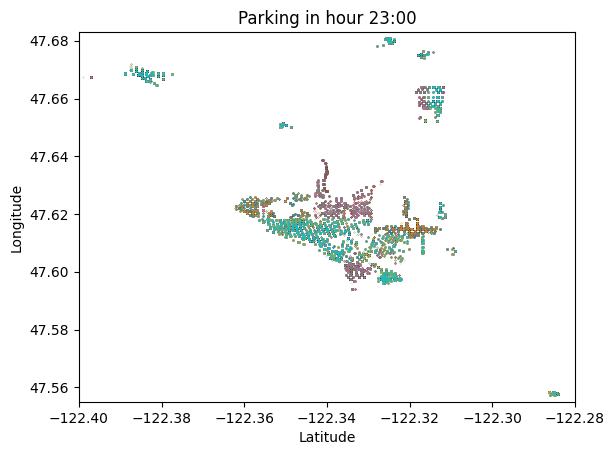

In [10]:
image_array = []

for key in dfDict:
    
    x_axis = dfDict[key]['Longitude']
    y_axis = dfDict[key]['Latitude']
    #color = lower_48_frame['Auto/retail loan delinquency rate, All']
    titleStr = ('Parking in hour ' + str(key) + ':00')
    #fileNameStr = ('DataScience/censusData/parkingmaps/map' + str(key) + '.png')
    fileNameStr = ('map' + str(key) + '.png')

#DataScience/censusData/parkingmaps
    
    plt.scatter(x_axis, y_axis, s = .02)
    plt.title(titleStr)
    plt.rcParams["figure.figsize"] = (6,8.5)
    #plt.legend(loc = "lower left")
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    
    ### These specific values guarantee the same size of the graph values
    plt.xlim([-122.40,-122.28])
    plt.ylim([47.555,47.683])
    #plt.colorbar()
    #plt.savefig(fileNameStr, transparent = False, facecolor = 'white') # this line worked dont run it again!
    #print (fileNameStr)
    #plt.show()
    


In [11]:
folder_path = 'DataScience/censusData/parkingmaps'

charts = []

for i in range(24):
    image_path = 'parkingmaps/map' + str(i) + '.png'
    charts.append(imageio.imread(format(image_path)))

imageio.mimsave('./seattleparking.gif', charts, fps=3, format='GIF', loop = 0) ## this line worked!! Sorta....

C:\Users\aaron\AppData\Local\Temp\ipykernel_5360\4282008319.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  charts.append(imageio.imread(format(image_path)))


In [12]:
for key in dfDict:
    count = dfDict[key]['Transaction ID'].count()
    paymentSum = dfDict[key]['Amount Paid'].sum()
    durationSum = dfDict[key]['Duration In Minutes'].sum()
    cashPerCar = paymentSum / count
    print (key, ' count - ', count, ', cash per car -', cashPerCar,' Payment Sum - ', paymentSum, ' , duration sum - ', durationSum)

0  count -  1 , cash per car - 7.18  Payment Sum -  7.18  , duration sum -  427
1  count -  0 , cash per car - nan  Payment Sum -  0.0  , duration sum -  0
2  count -  0 , cash per car - nan  Payment Sum -  0.0  , duration sum -  0
3  count -  2 , cash per car - 9.5  Payment Sum -  19.0  , duration sum -  480
4  count -  101 , cash per car - 3.8995049504950496  Payment Sum -  393.85  , duration sum -  19174
5  count -  305 , cash per car - 4.80344262295082  Payment Sum -  1465.0500000000002  , duration sum -  67423
6  count -  607 , cash per car - 4.645370675453047  Payment Sum -  2819.74  , duration sum -  124303
7  count -  2383 , cash per car - 2.6200545530843473  Payment Sum -  6243.59  , duration sum -  294852
8  count -  9179 , cash per car - 2.4857860333369652  Payment Sum -  22817.030000000002  , duration sum -  1171257
9  count -  9863 , cash per car - 2.7398904998479163  Payment Sum -  27023.54  , duration sum -  1104957
10  count -  11305 , cash per car - 3.8916479433878814 

C:\Users\aaron\AppData\Local\Temp\ipykernel_5360\1968822711.py:5: RuntimeWarning: invalid value encountered in scalar divide
  cashPerCar = paymentSum / count
